<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/4_Aceptaci%C3%B3n_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las librerías de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from scipy.stats import skew,kurtosis

1. Se cargan los datos de trabajo

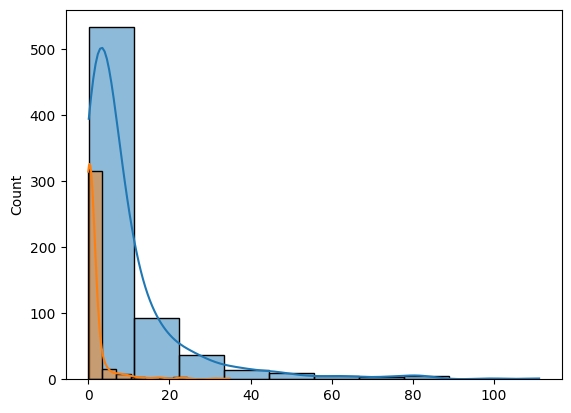

In [ ]:
nxlo = '/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/2. FallasTecnológicas.xlsx'
nxle = '/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/2. AdmonEjecProcesos.xlsx'

XDBo=pd.read_excel(nxlo,sheet_name=0); XDBo=XDBo.dropna()
XDBe=pd.read_excel(nxle,sheet_name=0); XDBe=XDBe.dropna()

#Distribuciones de pérdida

LDAo=np.multiply(XDBo.iloc[:,3],XDBo.iloc[:,4])
LDAe=np.multiply(XDBe.iloc[:,3],XDBe.iloc[:,4])

#Se procede con la gráfica de las distribuciones
plt.figure()
sns.histplot(LDAo, kde=True, bins=10)
sns.histplot(LDAe, kde=True, bins=10)
plt.show()

2. Creamos el método para calcular las propiedades estadísticas de una variable

In [ ]:
def metricas(XLDA):
  u=np.mean(XLDA)
  var=np.var(XLDA)
  stdv=np.sqrt(var)
  cas=skew(XLDA)
  ck=kurtosis(XLDA)
  if abs(cas)<0.5 and abs(ck)<0.5:
      tpdst="Posible distribución Normal"

  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible distribución Exponencial"
    elif ck>=6:
      tpdst="Posible distribución Gamma"
    else:
      tpdst="Posible distribución Weibull"

  elif cas<0 and ck<3:
    tpdst="Posible distribución Beta"
  elif ck<3:
    tpdst="Posible distribución Uniforme"
  else:
    tpdst="No se pudo identificar la distribución"

  return u,var,stdv,cas,ck, tpdst

3. Se calculan las propiedades estadísticas de las pérdidas (internas, externas)


In [ ]:
mobs=metricas(LDAo)
print("La media de los datos internos es:", mobs[0])
print("La desviación de los datos internos es:", mobs[2])
print("La asimetría de los datos internos es:", mobs[3])
print("La curtosis de los datos internos es:", mobs[4])

#Me interesan los datos externos que estén en estos límites
LS=mobs[0]+2*mobs[2];LI=mobs[0]-2*mobs[2]
print("El límite superior de los datos internos es:", LS)
print("El límite inferior de los datos internos es:", LI)
print("El tipo de distribución es:", mobs[5])

#Métricas datos externos
print("\n")
mdex=metricas(LDAe)
print("La media de los datos externos es:", mdex[0])
print("La desviación de los datos externos es:", mdex[2])
print("La asimetría de los datos externos es:", mdex[3])
print("La curtosis de los datos externos es:", mdex[4])

#Los límites externos son
LSE=mdex[0]+2*mdex[2];LIE=mdex[0]-2*mdex[2]
print("El límite superior de los datos externos es:", LSE)
print("El límite inferior de los datos externos es:", LIE)
print("El tipo de distribución es:", mdex[5])

La media de los datos internos es: 9.45111269614836
La desviación de los datos internos es: 13.707471533012761
La asimetría de los datos internos es: 3.3483604527095365
La curtosis de los datos internos es: 14.16771362667782
El límite superior de los datos internos es: 36.866055762173886
El límite inferior de los datos internos es: -17.96383036987716
El tipo de distribución es: Posible distribución Exponencial


La media de los datos externos es: 1.469187040102234
La desviación de los datos externos es: 4.008350447638778
La asimetría de los datos externos es: 5.059212525816747
La curtosis de los datos externos es: 29.643693069779438
El límite superior de los datos externos es: 9.48588793537979
El límite inferior de los datos externos es: -6.547513855175321
El tipo de distribución es: Posible distribución Exponencial


4. Procedemos con la gráfica de las funciones de pertenencia

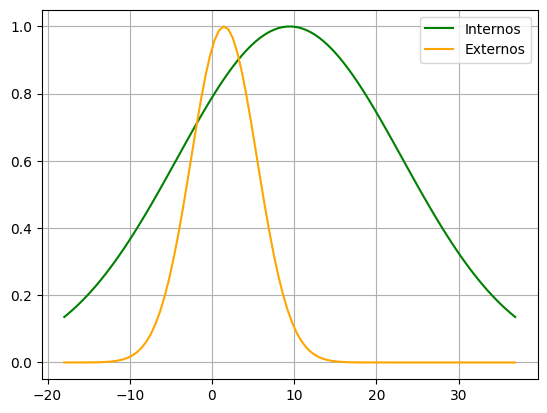

In [ ]:
x=np.linspace(LI, LS, 100) #Como es para gráfica tomo el intervalo más grande

#Esta es la función de los internos
VPo=np.exp(-0.5*((x-mobs[0])/mobs[2])**2)
VPe=np.exp(-0.5*((x-mdex[0])/mdex[2])**2)

#La gráfica de integración es:
plt.figure()
plt.plot(x,VPo, color='green', label='Internos')
plt.plot(x,VPe, color='orange', label='Externos')
plt.legend()
plt.grid()
plt.show()


5. Se procede con la integración de los datos

In [ ]:
xint=LDAe #Los datos de integración son los externos

#Evaluamos los datos externos con respecto a la estructura interna
VPoint=np.exp(-0.5*((xint-mobs[0])/mobs[2])**2)

#Evaluamos los datos externos con respecto a la estructura externa
VPeint=np.exp(-0.5*((xint-mdex[0])/mdex[2])**2)

#Donde los datos externos están por debajo de los datos internos
filas=np.where(VPeint<=VPoint)[0]
XDint=LDAe[filas] #Datos de integración

#Antes de la integración mostramos las métricas originales
mobs=metricas(LDAo)
cas_antes=mobs[3]
print("La media de los datos internos es:", mobs[0])
print("La desviación de los datos internos es:", mobs[2])
print("La asimetría de los datos internos es:", mobs[3])
print("La curtosis de los datos internos es:", mobs[4])

#Se integran los datos que se pueden
LDAo2=np.concatenate((LDAo,XDint))

#Como quedo la variable después
mint=metricas(LDAo2)
cas_despues=mint[3]
print("La media de los datos internos es:", mint[0])
print("La desviación de los datos internos es:", mint[2])
print("La asimetría de los datos internos es:", mint[3])
print("La curtosis de los datos internos es:", mint[4])

var_cas=((cas_antes-cas_despues)/cas_antes)*100
print("La variación de la asimetría es:", var_cas)

La media de los datos internos es: 9.45111269614836
La desviación de los datos internos es: 13.707471533012761
La asimetría de los datos internos es: 3.3483604527095365
La curtosis de los datos internos es: 14.16771362667782
La media de los datos internos es: 9.508276312482156
La desviación de los datos internos es: 13.493165465074076
La asimetría de los datos internos es: 3.3495617938047255
La curtosis de los datos internos es: 14.38954668251814
La variación de la asimetría es: -0.03587848776008717


# Análisis de resultados

Para la integración de datos a las operaciones del negocio, se tomó una base de datos externa la cual poseía un total de 350 datos. Esta base de datos posee las siguientes métricas estadísticas, la media, desviación, el coeficiente de asimetría y un coeficiente de curtosis.

La base de datos interna posee un total de 701 datos con las siguientes métricas estadísticas (...), de estas métricas se puede observar la diferencia tan grande que existe entre la media de las pérdidas, lo que muestra la heterogeneidad entre los datos.

Como resultado del proceso de integración, mediante el método de aceptación y rechazo, se pudieron integran un total de 35 datos solamente, lo que representa un 10% del total de los datos externos (350).

Es importante mencionar que las métricas estadísticas de curtosis y asimetría no tuvieron variaciones significativas luego de la integración, lo que garantiza la estabilidad original de los datos.